# STAT 207 Project 02 - VIDEO GAMES ANALYSIS

Rudrakshi Mittal<br>
Shubhan Chari

### Contribution Report

In this contribution report, you should list the following:

1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions of each team member to the report.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

rmittal5 should be graded. Shubhan Chari (schari3) worked on parts 1-2 and Rudrakshi Mittal (rmittal5) worked on parts 3-4. We both discussed the project throughout the process.

## 1. Introduction

This dataset represents the sales of over 1000 video games released between 2004 and 2010. The data was collected by Dr. Joe Cox, who extracted the data from VGChartz.com. They extrapolated samples from small retail stores in order to estimate sales. However, this data also has a number of other variables for each video game, including logical variables, release year, and review score. In this report, we will focus on **one logical variable** and **one quantitative variable.** These variables are **Nintendo** (if a game was released by Nintendo) and **Review Score** (how much the player based like a game).

This data represents a sample, as it is nearly impossible to find every single game that was released between 2004 and 2010. Furthermore, the sales and review score figures are largely estimates as finding the ground truth would require that every single person that bought the game was surveyed as a part of data collection (which is impossible).

With this in mind, we have **2 research questions:**
1. What proportion of video games released from 2004 to 2010 were released by Nintendo? What is a range of reasonable values for this proportion among all video games?
2. How many video games have a high review score (≥80)? What is a reasonable range of values for this number in the population?

As students that have played video games throughout our lives, other individuals that are interested in or are studying video games are interested in different video game companies and how people like these games. Nintendo has been such a large presence in the video game community, especially for younger audiences, so seeing their influence on the video game market may be interesting. Furthermore, as individuals who generally like video games, we want to see if the general public also shares the same sentiments as us. In a broader sense, if other developers see how dominant/non-dominant Nintendo truly is, they could adjust their practices to match Nintendo and potentially create some good competition in the video game space.

In [ ]:
#Imports here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("video_games.csv",encoding="unicode-escape")


In [ ]:
df.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Re-release,Usedprice,lnUsedPrice,Review Score,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., L...",Action,1,1,24.95,3.216874,85,7225,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,0,0,0,0,0,4016016,"Bandai Co., Ltd., Ubisoft Entertainment SA, Ub...",Strategy,0,0,14.95,2.704711,89,7921,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., L...","Action, Racing / Driving, Sports",1,0,22.95,3.133318,81,6561,1,0,0,0,0,2,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,0,0,0,0,0,4016016,"Sony Computer Entertainment America, Inc., SCE...",Sports,0,0,12.95,2.561096,81,6561,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,0,0,0,0,0,4016016,"Activision Asia-Pacific, Activision Deutschlan...",Action,1,0,14.95,2.704711,61,3721,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
for i in range(len(df.columns)) :
    print(df.columns[i])

Console
Title
US Sales (millions)
Block4
Block2
Block1
Block0.5
YearReleased
2004
2005
2006
2007
2008
2009
2010
YearReleasedSq
Publisher
Genre
Sequel
Re-release
Usedprice
lnUsedPrice
Review Score
ReviewSq
RatingE
RatingT
RatingM
Lifecycle
LifecycleSq
MaxPlayers
MaxPlayersSq
Online
Licensed
Handheld
Accessory
LtdEdition
Multiplatform
GBA
GCN
NDS
Wii
PS2
PS3
PSP
Xbox
X360
Action
Adventure
Educational
Racing
RPG
Simulation
Sports
Strategy
2K
Acclaim
Activision
Atari
Capcom
Disney
Eidos
EA
Infograme
Konami
Microsoft
Midway
Namco
Nintendo
Rockstar
Sony
Sega
THQ
SquareEnix
Ubisoft
Adult
Anime
Arcade
Battlemech
Boardgame
Cards
Casino
Chess
Comics
Cyberpunk
Detective
Fighting
Flight
Gameshow
Helicoptor
HistoricalBattle
Horror
InteractiveFiction
InteractiveFictionGraphics
InteractiveMovie
Managerial
MartialArts
MedievalFantasy
Meditative
MentalTraining
Naval
Paddle
PersistentUniverse
Pinball
PostApocalyptic
Puzzle
RealTime
RhythmAction
SciFi
Shooter
Spy
Stealth
SurvivalHorror
Tank
Train
TurnBas

## 2. Confidence Interval Analytical Tasks

Our research question for this section is: <br>

*What proportion of video games released from 2004 to 2010 were released by Nintendo? What should be considered a reasonable value for this proportion among all video games?*

To answer this, we will use a **95% confidence interval** to answer both questions.

In [ ]:
# Checking what values exist for the "Nintendo" column

df["Nintendo"].value_counts()

Nintendo
0    1664
1     106
Name: count, dtype: int64

In [ ]:
# Checking what values exist for the "Review Score" column


df["Review Score"].value_counts()

Review Score
72    62
73    61
75    60
80    56
70    56
      ..
26     1
20     1
12     1
97     1
17     1
Name: count, Length: 77, dtype: int64

### 2b. Cleaning

I will explain why the data is good and we don't have to make any adjustments.

In [ ]:
print(df.isnull().sum())

Console                0
Title                  0
US Sales (millions)    0
Block4                 0
Block2                 0
                      ..
Platform               0
Isometric              0
SideScrolling          0
TopDown                0
ThirdPerson            0
Length: 166, dtype: int64


In [ ]:
# The games that have "Nintendo" == 1
nintendo = df[df["Nintendo"] == 1]

# All of the below Publisher values contain "Nintendo"
nintendo["Publisher"].unique()

array(['Nintendo Australia Pty., Ltd., Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH',
       'Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH',
       'Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Canada Ltd., Nintendo of Europe GmbH',
       'Nintendo Co., Ltd., Nintendo France SARL, Nintendo of America Inc., Nintendo of Europe GmbH',
       'Atlus Co., Ltd., Atlus U.S.A., Inc., Nintendo of Europe GmbH',
       'Bandai Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH',
       'Nintendo Co., Ltd., Nintendo France SARL, Nintendo of America Inc., Nintendo of Canada Ltd., Nintendo of Europe GmbH',
       'Nintendo of America Inc., Nintendo of Europe GmbH, Square Enix Co., Ltd.',
       'Nintendo Co., Ltd., Nintendo of America Inc.',
       'Hudson Entertainment, Inc., Hudson Soft Company, Ltd., Nintendo of Europe GmbH',
       'FromSoftware, Inc., Nintendo of America Inc., Nintendo of Europe GmbH',
       'Nintendo Co

Since the only values are 0 and 1, we don't have to do much data cleaning. If you are wondering if they may have missed some games, my data validation process is below:

In [ ]:
# The games that have "Nintendo" == 0
not_nintendo = df[df["Nintendo"] == 0]

# All of the below Publisher values do not contain "Nintendo"
not_nintendo["Publisher"].unique()

array(['Bandai Co., Ltd., Ubisoft Entertainment SA, Ubisoft, Inc.',
       'Sony Computer Entertainment America, Inc., SCEE, Sony Computer Entertainment Europe Ltd., Sony Computer Entertainment Incorporated',
       'Activision Asia-Pacific, Activision Deutschland GmbH, Activision Publishing, Inc., Activision (UK) Limited, ATVI France SARL, Taito Corporation',
       'Electronic Arts, Inc.', 'Namco Hometek Inc., Namco Limited, SCEE',
       'Konami Corporation, Konami of Europe GmbH, Konami Digital Entertainment, Inc.',
       'KOEI Co., Ltd., KOEI Corporation, KOEI Ltd.',
       'SEGA Corporation, SEGA Europe Ltd.', 'Namco Hometek Inc.',
       'Capcom Co., Ltd., Capcom Entertainment, Inc., CE Europe Ltd.',
       'Taito Corporation, Ubisoft Entertainment SA, Ubisoft, Inc.',
       'THQ Inc.',
       'Ignition Entertainment Ltd., Ignition Entertainment Ltd. USA, Success Corp.',
       'Namco Europe Limited, Namco Hometek Inc., Namco Limited',
       'Ubisoft Entertainment SA, Ubisoft,

Since our second research question focuses on review scores, we need to remove any rows where the `Review Score` column has missing values. This ensures that all our calculations , such as median review scores and hypothesis testing are based on complete data.  






In [ ]:
df = df.dropna(subset=['Review Score'])

Even though the review scores column contains multiple values , however none of them are missing so we can assume that the dataset is complete and hence teh derived calculations and statistics from this dataset, is acurate.

### 2c. Descriptive Analytics

This section will show the important statistics to this research question.

In [ ]:
# Sample size
sample_size = len(df)

print("Our sample size is", sample_size, "video games.")

Our sample size is 1770 video games.


In [ ]:
# Variable summaries - for our "Nintendo" variable

num_nintendo = (df["Nintendo"]==1).sum() # number of games in the sample that were published by Nintendo
prop_nintendo = (df["Nintendo"]==1).mean() # proportion of games in the sample that were published by Nintendo
print("Number of Nintendo games in the sample:", num_nintendo)
print("Proportion of games in the sample that were published by Nintendo:", prop_nintendo)

Number of Nintendo games in the sample: 106
Proportion of games in the sample that were published by Nintendo: 0.059887005649717516


In our sample of **1770 video games** published between 2004 and 2010, **106** of those games were published by Nintendo. This means that the proportion of games in our sample that were published by Nintendo is **0.0599**.

### 2d. Confidence Interval
We are constructing the confidence interval in this section. We will choose a confidence level of **95%** to make a **95% confidence interval** for the population proportion of games released between 2004 and 2010 that were published by Nintendo.

In [ ]:
# Creating sampling distribution
data = []
for i in range(5000):
    sample = df.sample(n=len(df), replace=True)
    data.append((sample["Nintendo"]==1).mean())
sampling_dist = pd.DataFrame({"x": data})

In [ ]:
sampling_dist.head()

,x
0,0.061582
1,0.055932
2,0.053672
3,0.066667
4,0.056497


In [ ]:
# 95% CI means that we are taking the 0.025 quantile and the 0.975 quantile
ci = (sampling_dist["x"].quantile(0.025), sampling_dist["x"].quantile(0.975))
print("Our 95% confidence interval is:", ci)

Our 95% confidence interval is: (np.float64(0.04915254237288136), np.float64(0.0711864406779661))


We are 95% confident that the true population proportion of games released between 2004 and 2010 that were published by Nintendo is contained within the interval **(0.049, 0.0711)**.

## 3. Hypothesis Testing Analytical Tasks

For observing , how many Nintendo video games have been published in 2004 to 2010 (the first research question), we describe the hypotheses as following:

Null Hypothesis 

The true proportion of video games released between 2004 and 2010 is equal to 6%.

𝑝 = 0.06

Alternative Hypothesis :

The true proportion of video games released between 2004 and 2010 that were published by Nintendo is not equal to 6%.

𝑝 ≠ 0.06

This is a two-tailed test because we are testing if the observed proportion could be greater or smaller than the hypothesized 6%.

In [ ]:
std_dev1= sampling_dist["x"].std()
std_dev1

np.float64(0.005635928327595357)

In [ ]:
z_score1 = (prop_nintendo - 0.06)/std_dev1

In [ ]:
from scipy.stats import norm

In [ ]:
p_val = 2 *(abs(norm.cdf(z_score1)))
p_val

np.float64(0.9840043373876234)

To determine if we could accept the null hypothesis or not , we conducted a z - test with a 0.05 significance level. 

However after conducting the test we can conclude that since teh observed p- value is 0.98 it i ssignificantly higher than 0.05. Therefore, we fail to reject the null hypotheis . This suggest there is no statistically significant evidence to suggest that the true proportion of video games published by Nintendo between 2004 and 2010 is different from 6%.  

Thus, we fail to reject the null and conclude that the sample proportion is consistent with the assumed population proportion of 6%.

## Review Score

Our research question is: How many video games have a high review score (≥80)? What is a reasonable range of values for this number in the population?

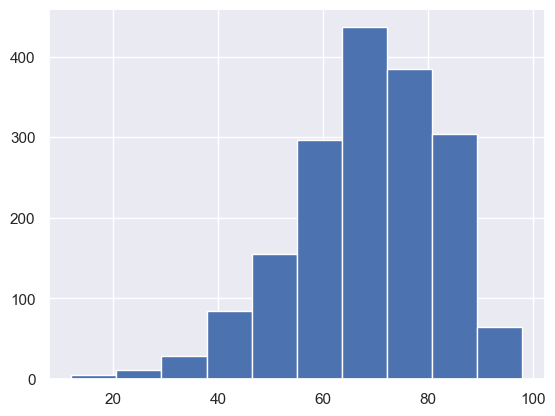

In [ ]:
plt.hist(df["Review Score"])
plt.show()

As we can observe, the distribution of review scores appears to be highly skewed to the left. In such cases, using the mean as a measure of central tendency may not be ideal because the mean is highly sensitive to extreme values (outliers).
To prevent this issue we use the median instead of the mean. Unlike the mean, which takes every value into account, the median simply identifies the middle value of an ordered dataset and it tends to be resistant to the outliers and skewness.

Since the threshold for a good review score as suggested in the question is 80, we describe the hypotheses as the following:

Null Hypothesis:

The observed median review score will not be different from 80

H₀ = 80

Alternative hypothesis:

The observed median review score will not be equal to 80

Hₐ > 80

In [ ]:
median = df["Review Score"].median()
median

70.0

In [ ]:
# Creating sampling distribution - fit to the null of 80
df["simulate"] = df["Review Score"] - median + 80
data2 = []
for j in range(5000):
    sample = df.sample(n=len(df), replace=True)
    data2.append((sample["simulate"]).median())
sampling_dist2 = pd.DataFrame({"x": data2})

In [ ]:
sampling_dist2.head()

,x
0,80.0
1,80.0
2,80.0
3,80.0
4,80.0


In [ ]:
# 95% CI means that we are taking the 0.025 quantile and the 0.975 quantile
ci2 = (sampling_dist2["x"].quantile(0.025), sampling_dist2["x"].quantile(0.975))
print("Our 95% confidence interval is:", ci2)

Our 95% confidence interval is: (79.0, 81.0)


In [ ]:
(sampling_dist2["x"] > 70).mean()

1.0

Since the p-value is 1, which is significantly larger than the chosen significance level of 0.05, we fail to reject the null hypothesis. This indicates that we do not have sufficient statistical evidence to conclude that the median review score is greater than 80, meaning that we don't believe that the average video game has a "good" review score.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

In this project, we looked at video games dataset and trends using confidence intervals and hypothesis testing. We estimated how many games Nintendo released between 2004 and 2010 and checked whether this number was different from what we expected (6 %). Our statistical z-test showed that there was no significant difference. This means that the proportion of Nintendo games in our sample matched what we assumed, which was 5.9 % compared to 6 %. We also analyzed review scores, specifically how many games had high scores (80 or above), and estimated a reasonable range for this number in the larger population.

To do so we used confidence intervals and used a threshold of 95 % confidence. Our findings suggest that Nintendo’s game releases during the 2004 - 2010 were in line with expectations, and there wasn’t strong statistical evidence to suggest otherwise. The confidence interval analysis gave us an idea of how many games received high review scores. These insights could be be useful to understand how the video game industry is affected by these statistics and how do these numbers effect the review scores.

Though there were some limitations, like the dataset might not include every game from 2004 to 2010, which could definitely affect results as it would suggest that the dataset wasn't complete. Review scores can also be subjective and matter exclusively to each person and the connection that they have to the game. It could also be influenced by things like platform exclusivity or game popularity. In the future, similar analysis if done over a longer time period or maybe done with a broader range of games, game companies or even including players of said games, can be done to get a more complete picture. Overall, this project showed how statistical measures can help us analyze video game trends and draw meaningful conclusions from the data.
